# DICE 2013R (Vanilla flavour)

This notebook compares DICE.jl to the `DICE2013R_100413_vanilla.gms` GAMS file.

In [1]:
# For Solving #
using DICE;

# For Comparing with GAMS data
using NBInclude;
@nbinclude("../GAMS/GAMS_Compare.ipynb")

# For Additional Plots
using Plots

#Note: we call `v2013R()`, which is sytactic sugar for `v2013R(Vanilla)`.
version = v2013R()

v2013R (Vanilla flavour)

## Base Price Scenario

The Vanilla flavour of the 2013R version has a base carbon price and an optimal carbon price scenario.

If you are interested in just the preset scenarios there is no reason to generate a configuration struct by calling `options(v2013R())`, since this is called internally and altered as needed if necessary.

Calling the solve function directly is all that's needed to obtain all results.


In [2]:
base = solve(BasePrice, version)

This is Ipopt version 3.12.13, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     3918
Number of nonzeros in inequality constraint Jacobian.:      177
Number of nonzeros in Lagrangian Hessian.............:      946

Total number of variables............................:     1546
                     variables with only lower bounds:      537
                variables with lower and upper bounds:      179
                     variables with only upper bounds:      119
Total number of equality constraints.................:     1376
Total number of inequality constraints...............:       59
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       59

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

Base (current policy) carbon price scenario using v2013R (Vanilla flavour).
A JuMP Model
Maximization problem with:
Variables: 1561
Objective function type: JuMP.VariableRef
`JuMP.GenericAffExpr{Float64,JuMP.VariableRef}`-in-`MathOptInterface.EqualTo{Float64}`: 656 constraints
`JuMP.GenericQuadExpr{Float64,JuMP.VariableRef}`-in-`MathOptInterface.EqualTo{Float64}`: 240 constraints
`JuMP.VariableRef`-in-`MathOptInterface.EqualTo{Float64}`: 15 constraints
`JuMP.VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 716 constraints
`JuMP.VariableRef`-in-`MathOptInterface.LessThan{Float64}`: 298 constraints
Nonlinear: 539 constraints
Model mode: AUTOMATIC
CachingOptimizer state: ATTACHED_OPTIMIZER
Solver name: Ipopt
Names registered in the model: C, CCA, CEMUTOTPER, CPC, CPRICE, DAMAGES, E, Eind, FORC, I, K, MCABATE, Mᵤₚ, Mₐₜ, Mₗₒ, PERIODU, RI, S, Tₐₜ, Tₗₒ, UTILITY, Y, YGROSS, YNET, Λ, Ω, μ

The variable `base` is now a complete solution of type `DICENarrative`.

It contains all of the model parameters and information, as well as usable results.

In [3]:
fieldnames(typeof(base))

(:constants, :parameters, :model, :scenario, :version, :variables, :equations, :results)

Whilst the `results` are fairly comprehensive, you may wish to look at specific values of the model directly. Since most of these are in their raw state you will need to `import JuMP` to read them correctly.

---

Word of warning: if you `print(base.model)` in this notebook you're gonna have a bad time.
It's apparently too big to print or something.
The thread just locks up/spools forever.

There's a *limit output* notebook extension which can truncate things for you.
It seems to be necessary if you want to use notebooks which have actual output.

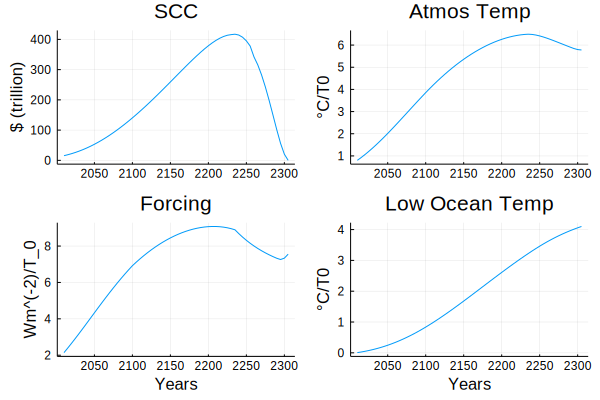

In [4]:
# Plot major outputs #
r = base.results;
a = plot(r.years,r.scc, ylabel="\$ (trillion)", title="SCC")
b = plot(r.years,r.Tₐₜ, ylabel="°C/T0", title="Atmos Temp")
c = plot(r.years,r.FORC, xlabel="Years", ylabel="Wm^(-2)/T_0", title="Forcing")
d = plot(r.years,r.Tₗₒ, xlabel="Years", ylabel="°C/T0", title="Low Ocean Temp")
plot(a,b,c,d,layout=(2,2),legend=false)

# Optimal Scenario

The optimal carbon price scenario is ran in a similar fashion.

In [5]:
opt = solve(OptimalPrice, version)

This is Ipopt version 3.12.13, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     3912
Number of nonzeros in inequality constraint Jacobian.:      176
Number of nonzeros in Lagrangian Hessian.............:      944

Total number of variables............................:     1544
                     variables with only lower bounds:      536
                variables with lower and upper bounds:      178
                     variables with only upper bounds:       75
Total number of equality constraints.................:     1374
Total number of inequality constraints...............:       59
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       59

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

Optimal carbon price scenario using v2013R (Vanilla flavour).
A JuMP Model
Maximization problem with:
Variables: 1561
Objective function type: JuMP.VariableRef
`JuMP.GenericAffExpr{Float64,JuMP.VariableRef}`-in-`MathOptInterface.EqualTo{Float64}`: 655 constraints
`JuMP.GenericQuadExpr{Float64,JuMP.VariableRef}`-in-`MathOptInterface.EqualTo{Float64}`: 240 constraints
`JuMP.VariableRef`-in-`MathOptInterface.EqualTo{Float64}`: 17 constraints
`JuMP.VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 714 constraints
`JuMP.VariableRef`-in-`MathOptInterface.LessThan{Float64}`: 297 constraints
Nonlinear: 538 constraints
Model mode: AUTOMATIC
CachingOptimizer state: ATTACHED_OPTIMIZER
Solver name: Ipopt
Names registered in the model: C, CCA, CEMUTOTPER, CPC, CPRICE, DAMAGES, E, Eind, FORC, I, K, MCABATE, Mᵤₚ, Mₐₜ, Mₗₒ, PERIODU, RI, S, Tₐₜ, Tₗₒ, UTILITY, Y, YGROSS, YNET, Λ, Ω, μ

# Base Price Comparison

In [6]:
params = loadGAMSResults(version, BasePrice);

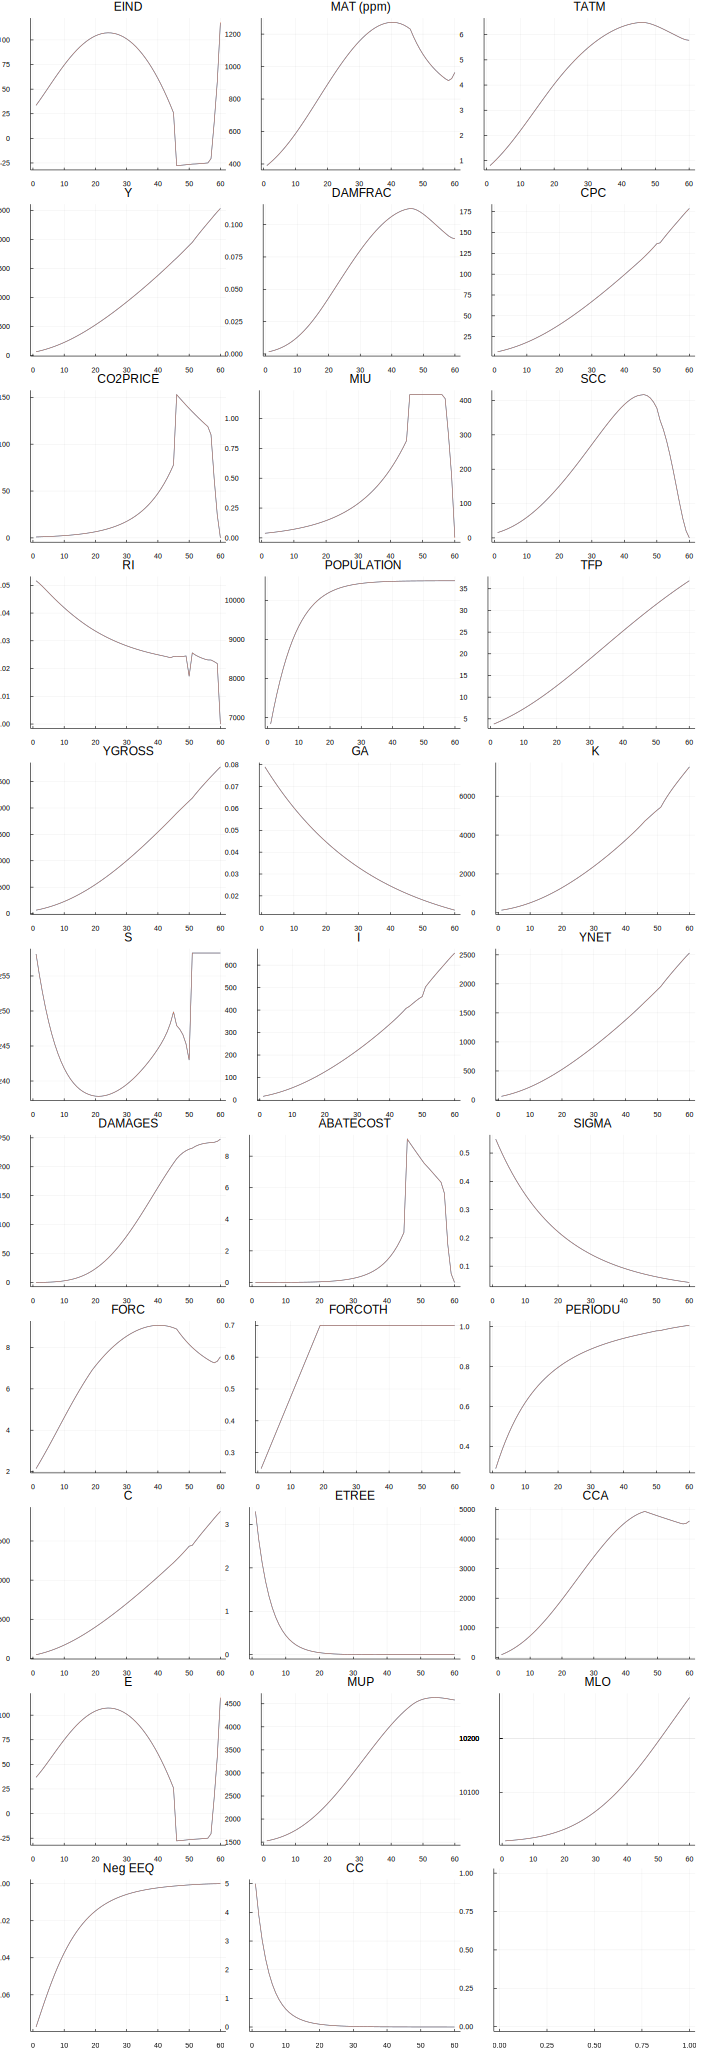

In [7]:
plotComparison(base, params)

CONOPT utilitly = `2668.2118865871`

In [8]:
base.results.UTILITY

2668.2118967686447

# Optimal Results Comparison

In [9]:
oparams = loadGAMSResults(version, OptimalPrice);

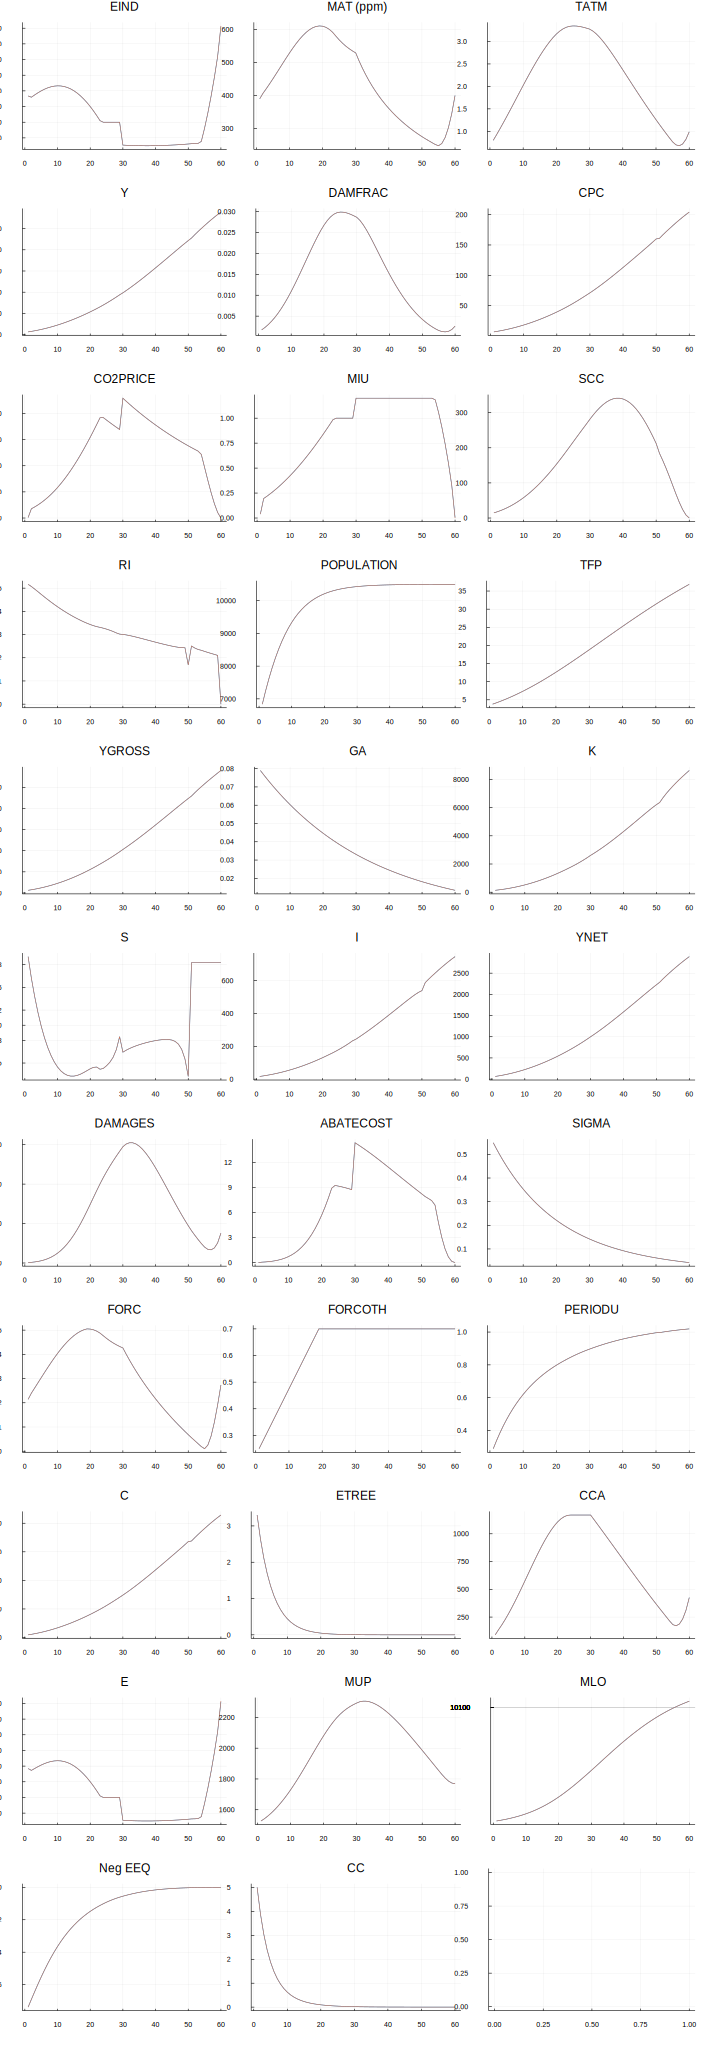

In [10]:
plotComparison(opt, oparams)

CONOPT utility = `2689.1761542629`

In [11]:
opt.results.UTILITY

2689.1761740086204